In [1]:
import numpy as np
import keras
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

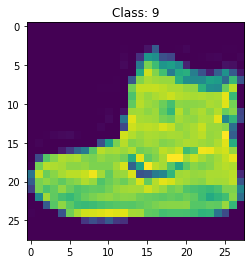

<Figure size 432x288 with 0 Axes>

In [2]:
from keras.datasets import fashion_mnist
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
plt.imshow(X_train[0])
plt.title('Class: {}'.format(y_train[0]))
plt.figure()

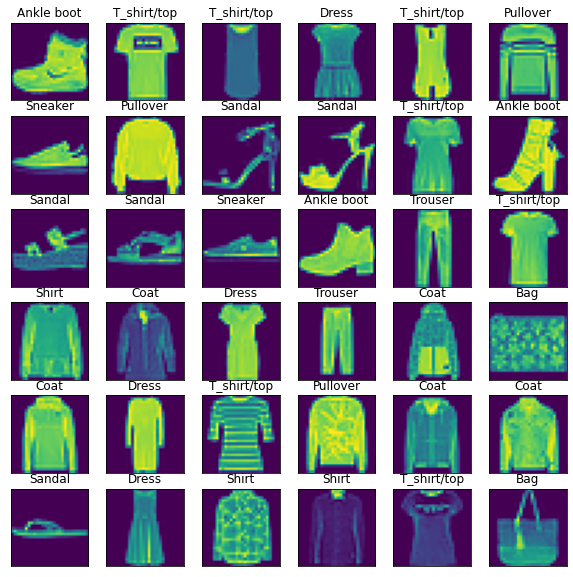

In [3]:
classes = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)))
    label_index = int(y_train[i]) 
    plt.title(classes[label_index])
plt.show()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train= X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)



In [7]:
from sklearn.preprocessing import MinMaxScaler
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())
trans = MinMaxScaler()
X_train = trans.fit_transform(X_train)
X_test = trans.fit_transform(X_test)
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())


255 0
255 0
1.0 0.0
1.0 0.0


In [8]:
svm=SVC(kernel='linear',random_state=20,C=1,tol=1e-5)
svm.fit(X_train,y_train)
print("Training Score:", svm.score(X_train, y_train))
print("Testing Score:", svm.score(X_test, y_test))

Training Score: 0.903
Testing Score: 0.8456


In [9]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,plot_roc_curve,plot_confusion_matrix,hinge_loss,ConfusionMatrixDisplay,RocCurveDisplay
y_pred=svm.predict(X_test)

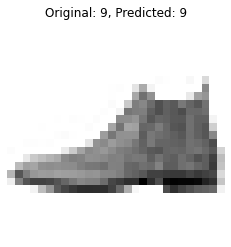

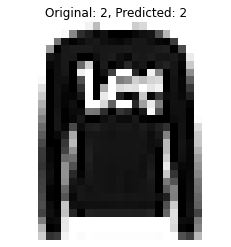

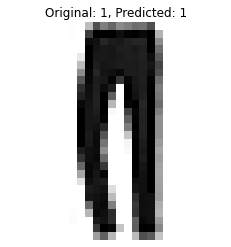

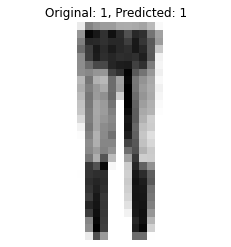

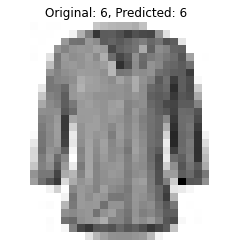

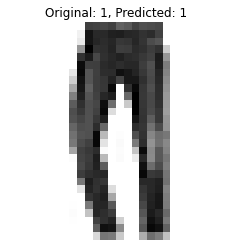

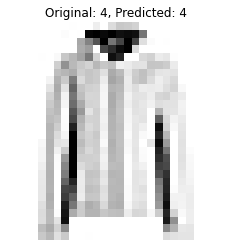

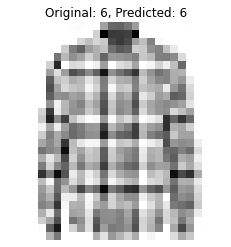

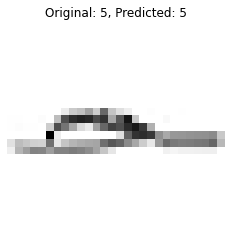

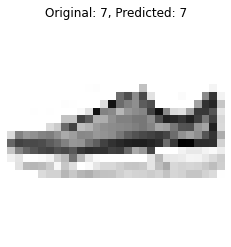

<Figure size 432x288 with 0 Axes>

In [58]:
for i in range(10):
 #plt.imshow()
  plt.imshow(X_test[i].reshape(28,28),cmap="binary")
  plt.title('Original: {}, Predicted: {}'.format(y_test[i], y_pred[i]))
  plt.axis("Off")
  plt.figure()

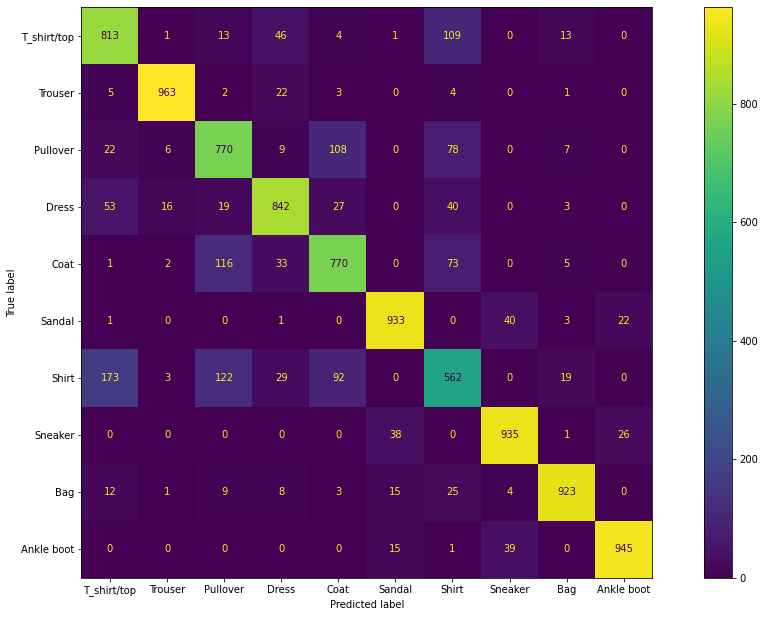

In [10]:
import matplotlib
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
dispcm = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
dispcm.plot()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

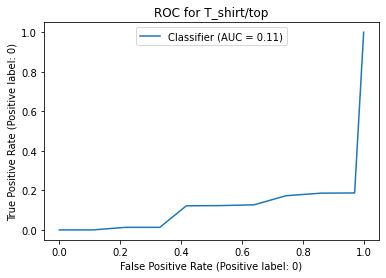

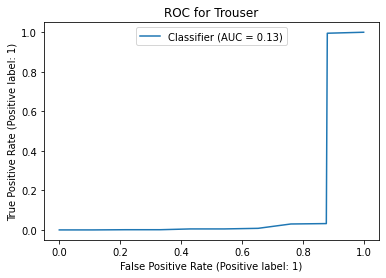

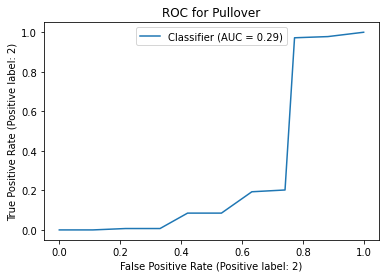

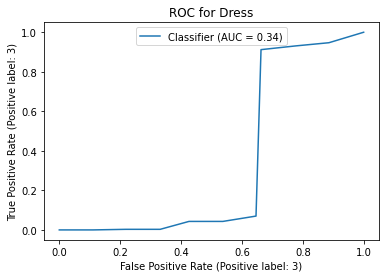

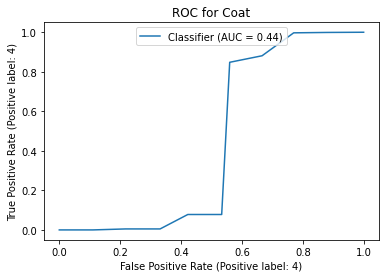

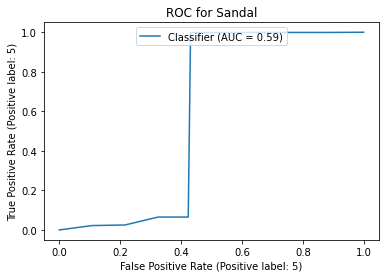

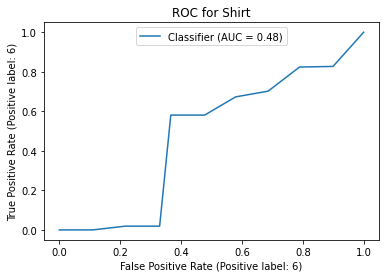

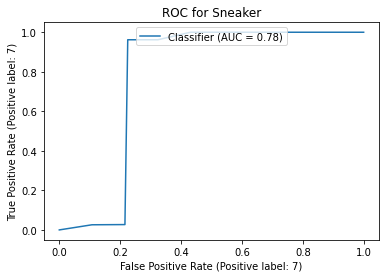

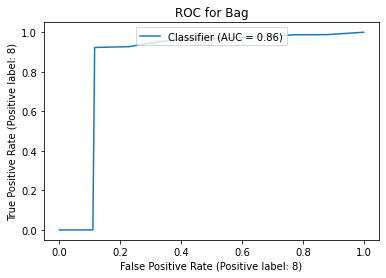

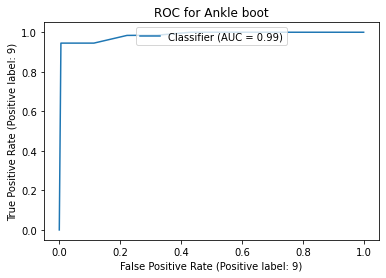

In [41]:
from sklearn.metrics import RocCurveDisplay
for i in list(set(y_test)):
    RocCurveDisplay.from_predictions(y_test, y_pred,pos_label=i)
    plt.title('ROC for '+ classes[i])
    plt.legend(loc='upper center')
    #plt.savefig('ROC for '+ classes[i]+'.jpg')

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

        axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
        axes[0].set_xlabel("Training examples")
        axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


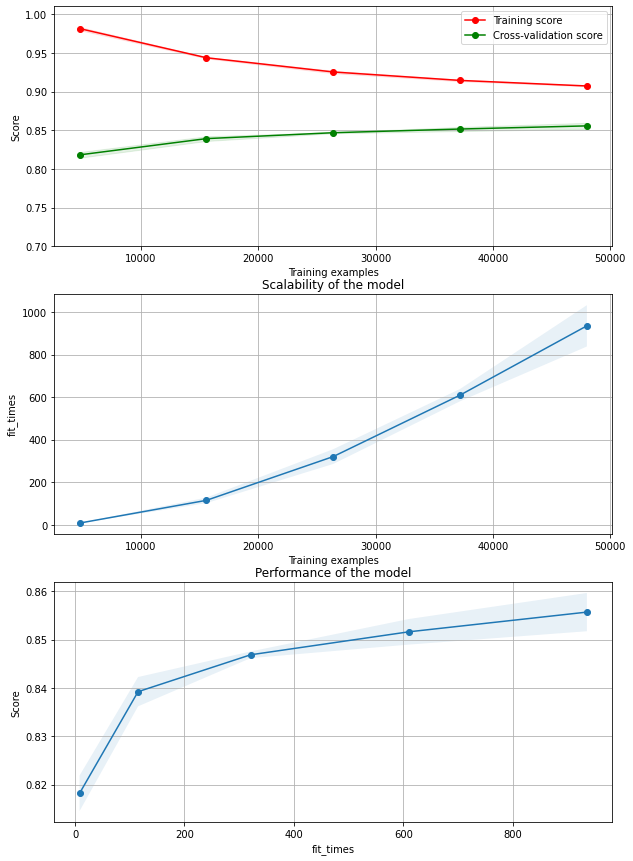

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
title = r"Learning Curves (SVM, Linear kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(kernel = 'linear',C=1,gamma=0.001)
plot_learning_curve(
    estimator, title, X_train, y_train, axes=axes[:], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)
plt.show()